# Sanity Checks

In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalStructure/NewTypes.jl")
include("AdditionalStructure/BitStringOps.jl")
include("AdditionalStructure/Measurements.jl")
include("AdditionalStructure/MICModels.jl")
include("AdditionalStructure/ModelRuns.jl")
include("AdditionalStructure/HelperTools.jl");

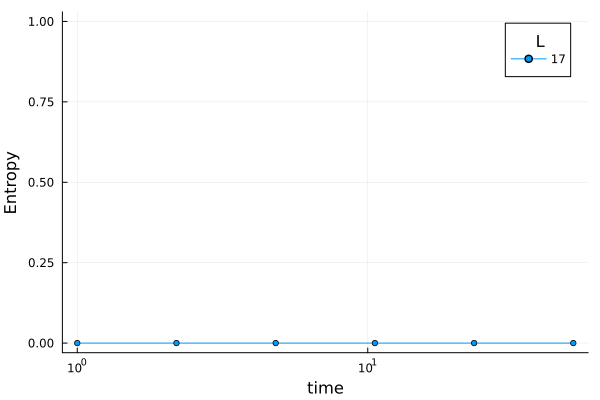

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0

In [8]:
# Geometry and other useful constant are packed in this struct, EdgeSquareLattice and VertexSquareLattice

L = 17
d = 2
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d);

# Unwrap the main function to be run interactively

p_anyon = 0 # The change of applying an anyon of a given type vs a TC stabiliser!
p_tc = 1 - p_anyon
stab_distro_e = Categorical([p_tc/2, p_tc/2, p_anyon/2, p_anyon/2, 0, 0, 0, 0]) # In this case we condense e particles!
stab_distro_m = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon/2, p_anyon/2, 0, 0]) # In this case we condense m particles!
stab_distro_f = Categorical([p_tc/2, p_tc/2, 0, 0, 0, 0, p_anyon/2, p_anyon/2]) # In this case we condense f particles!
stab_distro = stab_distro_f


nt = Int(5*1e1)  # total number of time steps to evolve
nmeasure = 6 # number of measurements (log-spaced in time)
measure_ts = exp10.(range(0, log10(nt+1), length=nmeasure)) # times at which to measure stuff
simulation = SimulationTime(nt, measure_ts)
L = system.L
nbits = system.nbits

number_of_experiments = 50
Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    state = z_polarised_state(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_PURE!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="Entropy",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

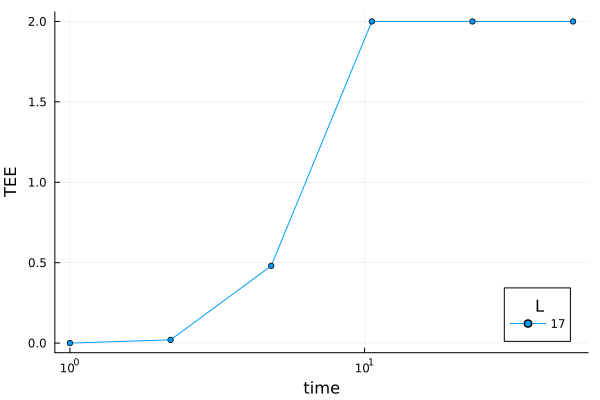

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.02  0.48  2.0  2.0  2.0

In [9]:
number_of_experiments = 50
Observables_t = zeros(nmeasure, number_of_experiments)
Threads.@threads for exp_index  in 1:number_of_experiments

    state = z_polarised_state(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEE!(MixedDestabilizer(z_polarised_state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEE",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'

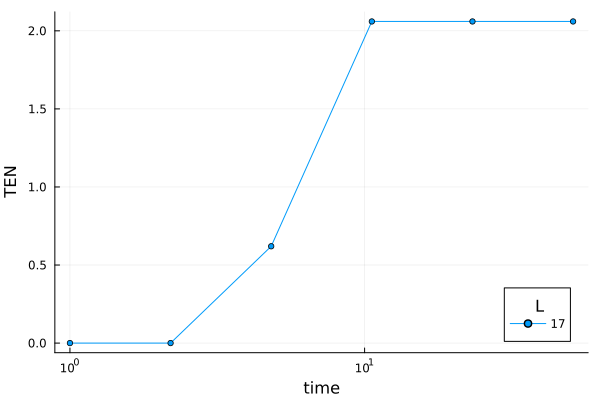

1×6 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.62  2.06  2.06  2.06

In [10]:
number_of_experiments = 50
Observables_t = zeros(nmeasure, number_of_experiments)
for exp_index  in 1:number_of_experiments

    state = z_polarised_state(system)

    # this is running the actual dynamics simulation (RENAME)
    Observable_t = run_measurement_only_dynamics_TEN!(MixedDestabilizer(state), # evolve this
                                            () -> toric_code(system, stab_distro),  # bind 
                                            system,
                                            simulation)

    Observables_t[:, exp_index] = Observable_t

end

Observables_t_avr = sum(Observables_t, dims=2)/number_of_experiments

# plot entropy as function of time
p = plot(measure_ts, Observables_t_avr,
    xlabel="time",
    ylabel="TEN",
    marker=(:circle, 3),
    xscale=:log10,
    legendtitle="L",
    label=L)
# gui()  # this is the equivalent of matplotlibs show()
# Note: not needed since we are plotting in the cell (with added name to the plot "p")
display(p)
Observables_t_avr'